# Medical Cost Analysis Project - Yunus Tijani 

In [1]:
#Importing required libraries for data analysis:

#Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing libraries
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

# Import label encoder
from sklearn import preprocessing

#ML Models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Reading Insurance data

In [2]:
insurance_data = pd.read_csv("C:/Users/Teleweb Services Ltd/Desktop/YUNUS/Documents/insurance.csv")

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.shape

(1338, 7)

In [5]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


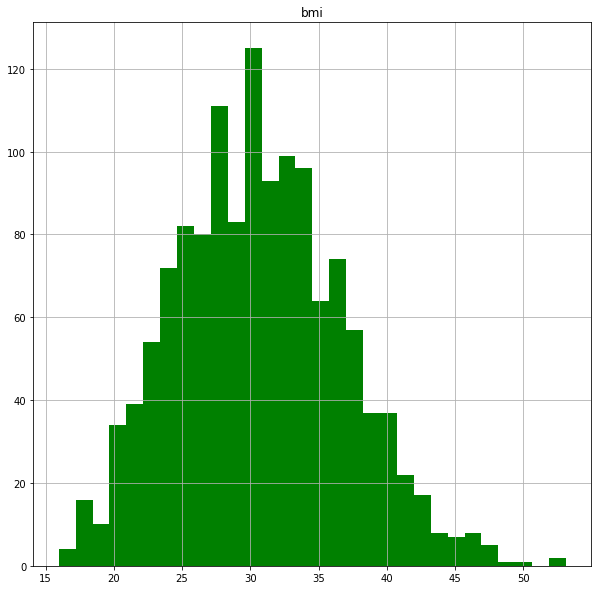

In [9]:
#Examine the distribution of Bmi 

insurance_data[['bmi']].hist(bins=30, figsize=(10,10), color='green')
plt.show()

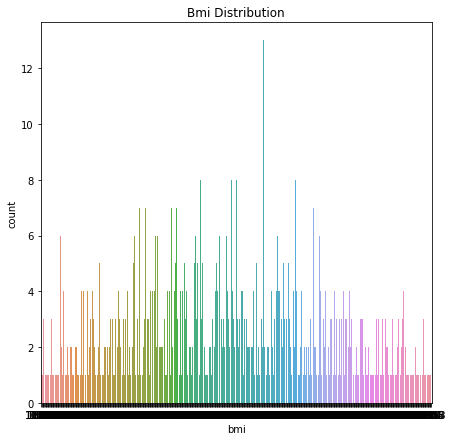

In [10]:
#Examine the distribution of Bmi 

plt.figure(figsize=(7,7))
sns.countplot(x='bmi', data=insurance_data)
plt.title('Bmi Distribution')
plt.show()

Text(0.5, 1.0, 'CHARGES FOR SMOKERS')

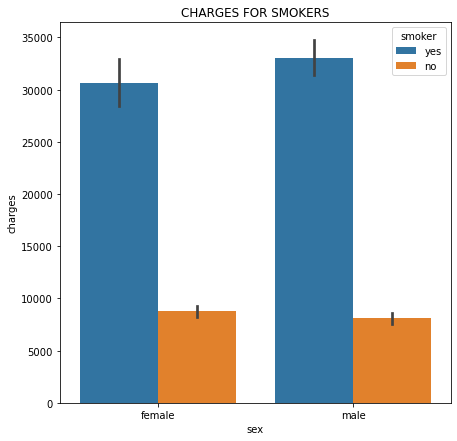

In [11]:
#Examine the relationship between “smoker” and “charges”

plt.figure(figsize=(7,7))
sns.barplot(x='sex', y='charges',hue='smoker', data=insurance_data)
plt.title('CHARGES FOR SMOKERS')

Text(0.5, 1.0, 'SMOKERS REGION')

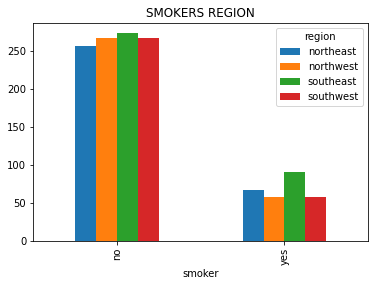

In [12]:
#Examine the relationship between “smoker” and “region”.

df=insurance_data.groupby(['smoker','region']).size()
df=df.unstack()
df.plot(kind='bar')
plt.title('SMOKERS REGION')

Text(0.5, 1.0, 'BMI vs SEX')

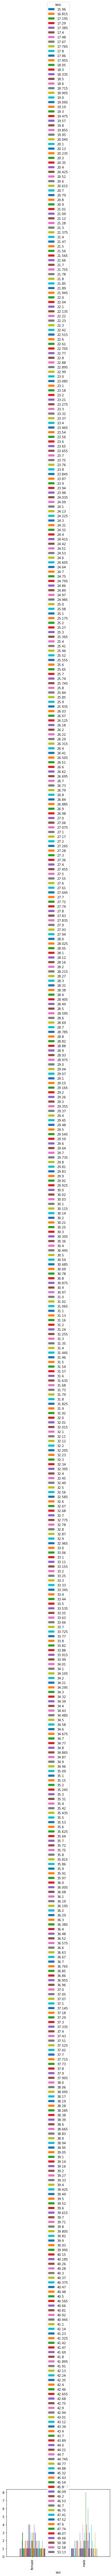

In [13]:
#Examine the relationship between “bmi” and “sex”.

df=insurance_data.groupby(['sex','bmi']).size()
df=df.unstack()
df.plot(kind='bar')
plt.title('BMI vs SEX')

Text(0.5, 1.0, 'Region vs Children')

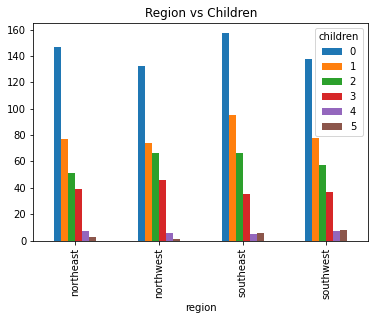

In [14]:
#Find the "region" with the most "children".

df=insurance_data.groupby(['region','children']).size()
df=df.unstack()
df.plot(kind='bar')
plt.title('Region vs Children')

Text(0.5, 1.0, 'Age vs Bmi')

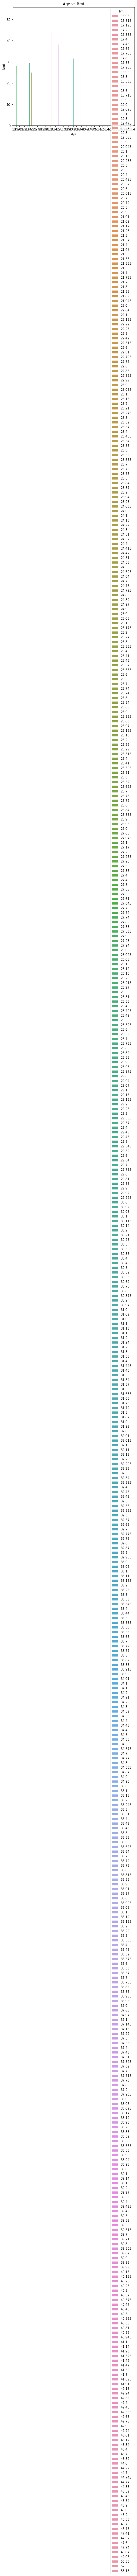

In [15]:
#Examine the relationship between “age” and “bmi”.

plt.figure(figsize=(7,7))
sns.barplot(x='age', y='bmi',hue='bmi', data=insurance_data)
plt.title('Age vs Bmi')


Text(0.5, 1.0, 'BMI vs CHILDREN')

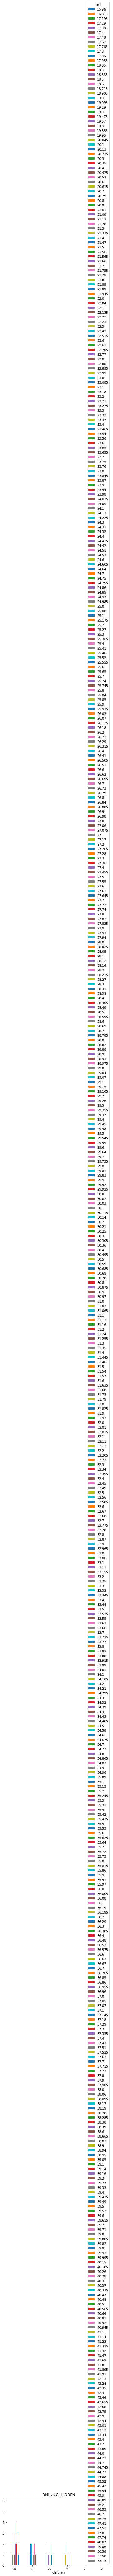

In [46]:
#Examine the relationship between “bmi” and “children”.

df=insurance_data.groupby(['children','bmi']).size()
df=df.unstack()
df.plot(kind='bar')
plt.title('BMI vs CHILDREN')

In [16]:
#Is there an outlier in the "bmi" variable? Please review.

#No. There isnt any outlier. Minimum value = 15.96 and maximum value = 53.13

In [ ]:
#Examine the relationship between “bmi” and “charges”.

df=insurance_data.groupby(['charges','bmi']).size()
df=df.unstack()
df.plot(kind='bar')
plt.title('BMI vs CHARGES')

Text(0.5, 1.0, 'Region vs Bmi vs Smoker')

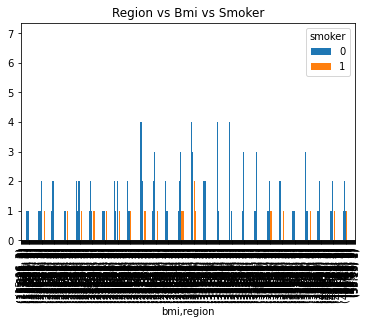

In [45]:
#Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

df=insurance_data.groupby(['bmi','region','smoker']).size()
df=df.unstack()
df.plot(kind='bar')
plt.title('Region vs Bmi vs Smoker')

# Data Preprocessing

In [17]:
#Encoding sex, smoker and region to numeric values 

insurance_data['sex'] = insurance_data['sex'].apply({'male':0, 'female':1}.get)
insurance_data['smoker'] = insurance_data['smoker'].apply({'yes':1, 'no':0}.get)
insurance_data['region'] = insurance_data['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [18]:
print(insurance_data)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       1       1  16884.92400
1      18    0  33.770         1       0       2   1725.55230
2      28    0  33.000         3       0       2   4449.46200
3      33    0  22.705         0       0       3  21984.47061
4      32    0  28.880         0       0       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       0       3  10600.54830
1334   18    1  31.920         0       0       4   2205.98080
1335   18    1  36.850         0       0       2   1629.83350
1336   21    1  25.800         0       0       1   2007.94500
1337   61    1  29.070         0       1       3  29141.36030

[1338 rows x 7 columns]


In [19]:
#splitting the features and label training data
x = insurance_data.drop(['charges'], axis=1)
y = insurance_data.loc[:,"charges"]

In [20]:
#saving the columns names

features = x.columns

In [21]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'region, smoker, sex'
insurance_data['region']= label_encoder.fit_transform(insurance_data['region'])
insurance_data['smoker']= label_encoder.fit_transform(insurance_data['smoker'])
insurance_data['sex']= label_encoder.fit_transform(insurance_data['sex'])
  

In [22]:
#splitting the features and label training data

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1003, 6)
(335, 6)
(1003,)
(335,)


In [23]:
#Using the standard scaling to scale the train data.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=features)


In [24]:
#Using the standard scaling to scale the test data.
test_data = scaler.fit_transform(X_test)
test_data = pd.DataFrame(X_test, columns =features)


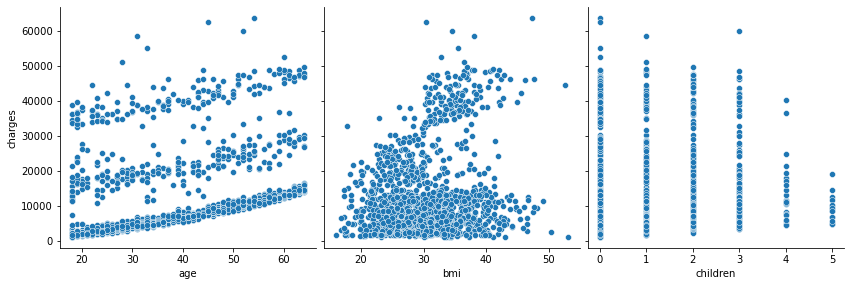

In [25]:
# Using pairplot to visualize the data for correlation

sns.pairplot(insurance_data, x_vars=['age', 'bmi','children'], y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

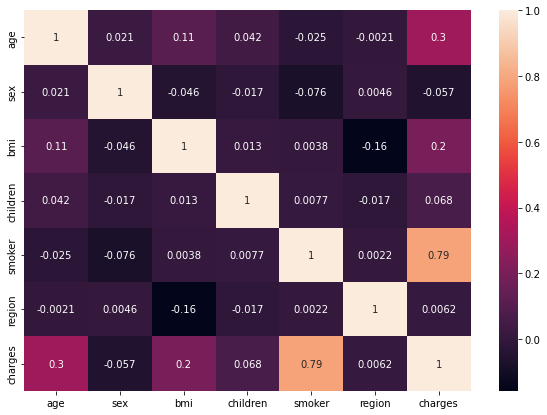

In [26]:
#Use Pearson correlation to see which features are correlated.

plt.figure(figsize=(10,7))
sns.heatmap(insurance_data.corr(), annot = True)
plt.show()

# Model Training & Selection

In [27]:
#initialize Machine learning models
linearreg = LinearRegression()


In [28]:
#Fitting the machine learning models
linearreg.fit(X_train, y_train)


LinearRegression()

In [29]:
#Evaluating the model on the training data. 

linearreg_score = linearreg.score(X_train, y_train)

In [30]:
#saving models scores  in dataframe 
results = pd.DataFrame({
    'Model': [ 'Linear Regression'],
    'Score': [linearreg_score]})
result = results.sort_values(by='Score', ascending=False)
result = result.set_index('Score')
result

,Model
Score,
0.744909,Linear Regression


In [31]:
#Predicting the validation data using r2_score
predicttrain_linearreg = linearreg.predict(X_train)

print("R2 Train score: ",(r2_score(y_train, predicttrain_linearreg)))

R2 Train score:  0.7449087316606229


# Model Evaluation 

In [32]:
linearreg.fit(X_test, y_test)

LinearRegression()

In [33]:
#Predicting the validation data using r2_score

predict_linearreg = linearreg.predict(X_test)


In [34]:
#Evaluating the model on the training data. 

linearreg_testscore = linearreg.score(X_test, y_test)

In [35]:
#saving models scores  in dataframe 
results = pd.DataFrame({
    'Model': [ 'Linear Regression'],
    'Score': [linearreg_testscore]})
result = results.sort_values(by='Score', ascending=False)
result = result.set_index('Score')
result

,Model
Score,
0.769628,Linear Regression


In [36]:
# the r2 value of  test data

print("R2 Test score: ",(r2_score(y_test, predict_linearreg)))

R2 Test score:  0.7696278040532132


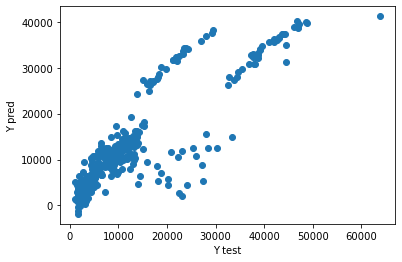

In [37]:
#visualizing the test result
plt.scatter(y_test, predict_linearreg)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

# Cost Estimation with new data

In [38]:
#Testing with a new data

new_data1 = {'age':30, 'sex':0, 'bmi':35, 'children':3, 'smoker':1, 'region':3}
new_data2 = {'age':45, 'sex':1, 'bmi':50, 'children':2, 'smoker':0, 'region':1}
new_data3 = {'age':20, 'sex':0, 'bmi':28, 'children':0, 'smoker':1, 'region':2}

index = [0]
new_result1 = pd.DataFrame(new_data1, index)
new_result2 = pd.DataFrame(new_data2, index)
new_result3 = pd.DataFrame(new_data3, index)

In [39]:
new_result1

,age,sex,bmi,children,smoker,region
0,30,0,35,3,1,3


In [40]:
new_result2

,age,sex,bmi,children,smoker,region
0,45,1,50,2,0,1


In [41]:
new_result3

,age,sex,bmi,children,smoker,region
0,20,0,28,0,1,2


In [42]:
insurance_costestimation = linearreg.predict(new_result1)
print("The medical insurance cost of the customer is: ", insurance_costestimation)

The medical insurance cost of the customer is:  [33155.46150894]


In [43]:
insurance_costestimation = linearreg.predict(new_result2)
print("The medical insurance cost of the customer is: ", insurance_costestimation)

The medical insurance cost of the customer is:  [16065.77064337]


In [44]:
insurance_costestimation = linearreg.predict(new_result3)
print("The medical insurance cost of the customer is: ", insurance_costestimation)

The medical insurance cost of the customer is:  [25809.39206268]
